In [112]:
#1 імпорт файлу
import pandas as pd
import numpy as np

df = pd.read_csv("C:/Users/Саша/Desktop/Global YouTube Statistics.csv", encoding="cp1251")
 

In [113]:
#2 Перші пять рядків
df.head(5)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [114]:
#розмір датасету
df.shape
df.dtypes

rank                                         int64
Youtuber                                    object
subscribers                                  int64
video views                                float64
category                                    object
Title                                       object
uploads                                      int64
Country                                     object
Abbreviation                                object
channel_type                                object
video_views_rank                           float64
country_rank                               float64
channel_type_rank                          float64
video_views_for_the_last_30_days           float64
lowest_monthly_earnings                    float64
highest_monthly_earnings                   float64
lowest_yearly_earnings                     float64
highest_yearly_earnings                    float64
subscribers_for_last_30_days               float64
created_year                   

In [115]:
#Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків  у кожному зі стовпців (використовуйте методи isna та sum).
#Якщо є пропуски, замінить їх на NaN, потім тип даних на числовий.

print(df.isna().sum())   
rows = df.index[df.isnull().any(axis=1)]
cols = df.columns[df.isnull().any()]
print(rows)
print(cols)

df1 = df.fillna(np.nan)



rows1 = df1.index[df.isnull().any(axis=1)]
cols1 = df1.columns[df.isnull().any()]
print(rows1)
print(cols1)
print(df1.isna().sum())
df1.dtypes


rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

rank                                         int64
Youtuber                                    object
subscribers                                  int64
video views                                float64
category                                    object
Title                                       object
uploads                                      int64
Country                                     object
Abbreviation                                object
channel_type                                object
video_views_rank                           float64
country_rank                               float64
channel_type_rank                          float64
video_views_for_the_last_30_days           float64
lowest_monthly_earnings                    float64
highest_monthly_earnings                   float64
lowest_yearly_earnings                     float64
highest_yearly_earnings                    float64
subscribers_for_last_30_days               float64
created_year                   

In [122]:
#Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків  у кожному зі стовпців (використовуйте методи isna та sum).
#Якщо є пропуски, замінить їх на NaN, потім тип даних на числовий.

#стовбець Country загублює свої значення при конвертації в float64 і все стає NaN
cols = ["category", "Abbreviation", "channel_type"]

for col in cols:
   df1[col] = pd.to_numeric(df1[col], errors="coerce")


In [125]:
#Замініть комірки з пропущеними значенями на середні за стовпцем. І тип даних на float.

mean = df1.mean(numeric_only=True)


df1 = df1.fillna(mean)

df1.head(5)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,NaN,T-Series,20082,India,NaN,NaN,...,2.000000e+06,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,NaN,youtubemovies,1,United States,NaN,NaN,...,3.490791e+05,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,NaN,MrBeast,741,United States,NaN,NaN,...,8.000000e+06,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,NaN,Cocomelon - Nursery Rhymes,966,United States,NaN,NaN,...,1.000000e+06,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,NaN,SET India,116536,India,NaN,NaN,...,1.000000e+06,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [126]:
#Перевірте кількість пропусків
print(df1.isna().sum())

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                   995
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               995
channel_type                               995
video_views_rank                             0
country_rank                                 0
channel_type_rank                            0
video_views_for_the_last_30_days             0
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days                 0
created_year                                 0
created_month                                5
created_date 

In [129]:
# Перевірте, скільки унікальних країн представлено у колонці "Country"
countries = df1["Country"].unique()
listofcountries = len(countries)

print(f"Number of unique countries: {listofcountries}")

Number of unique countries: 50


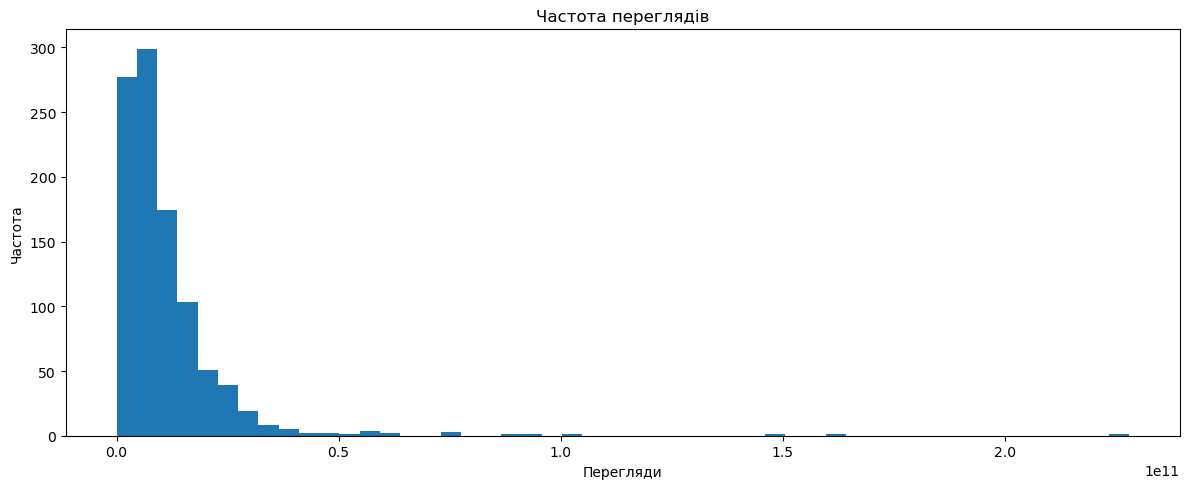

In [130]:
#Побудуйте діаграму розподілу переглядів (використовуйте kind='hist'):
import matplotlib.pyplot as plt



df1["video views"].plot.hist(bins=50, figsize=(12,5), title="Частота переглядів")

plt.xlabel("Перегляди")
plt.ylabel("Частота")

plt.tight_layout()
plt.show()

In [65]:
# . Визначте максимальну, мінімальну, середню кількість переглядів (використовуйте методи max, min, mean)
df.head(5)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1.0,NaN,245000000.0,2.280000e+11,NaN,NaN,20082.0,NaN,NaN,NaN,...,2.000000e+06,2006.0,NaN,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2.0,NaN,170000000.0,0.000000e+00,NaN,NaN,1.0,NaN,NaN,NaN,...,3.490791e+05,2006.0,NaN,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3.0,NaN,166000000.0,2.836884e+10,NaN,NaN,741.0,NaN,NaN,NaN,...,8.000000e+06,2012.0,NaN,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4.0,NaN,162000000.0,1.640000e+11,NaN,NaN,966.0,NaN,NaN,NaN,...,1.000000e+06,2006.0,NaN,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5.0,NaN,159000000.0,1.480000e+11,NaN,NaN,116536.0,NaN,NaN,NaN,...,1.000000e+06,2006.0,NaN,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [131]:
#Визначте максимальну, мінімальну, середню кількість переглядів (використовуйте методи max, min, mean)

maxviews = df1["video views"].max()
minviews = df1["video views"].min()
meanviews = df1["video views"].mean()
views = f"Кількість переглядів \nМаксимальна : {maxviews} \nМінімальна : {minviews} \nСередня : {meanviews}"
print(views)

Кількість переглядів 
Максимальна : 228000000000.0 
Мінімальна : 0.0 
Середня : 11039537052.03819


In [132]:
#Знайдіть країну, де найбільше відео було завантажено на YouTube
max_vid = df1["Country"].value_counts().idxmax()
print("Країна з найбільшою кількістю опублікованих відео:", max_vid)

Країна з найбільшою кількістю опублікованих відео: United States


In [133]:
#Знайдіть відео (виведіть його назву) з найбільшою та найменшою кількістю завантажень uploads.
max_uploads = df1.loc[df1["uploads"].idxmax()]
most_views = max_uploads["Title"] 
print(most_views)

ABP NEWS
